# Simple keywords cloud

***

#### Todo:
- bring keywords from more languages
- make languages optional (pass the languages as a list)
- make highlights optional (pass highlights as a dictionary)

In [176]:
import re
import keyword
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [177]:
urls = {
    'c#': {
        "url": "https://learn.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/",
        "tag": "code"
    },
    't-sql': {
        "url": "https://learn.microsoft.com/en-us/sql/t-sql/language-elements/reserved-keywords-transact-sql",
        "tag": "p"
    }
}

In [178]:
def get_keywords(lang):
    page = urlopen(urls[lang]['url'])
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")

    return [c.string for c in soup.find_all(urls[lang]['tag']) if len(re.findall(r'\w+', str(c.string))) == 1]

In [179]:
def generate_cloud():

    # Few keywords to highlight and their weight
    highlights = {
        'DataEngineer': 30,
        'SQLServer': 10,
        'TSQL': 10,
        'ETL': 10,
        'Python': 6,
        'Pandas': 4,
        'FastAPI': 6,
        'CSharp': 5
    }

    keywords = {
        'highlights': [k for k in highlights for _ in range(highlights[k])],
        'python': keyword.kwlist,
        'c#': get_keywords("c#"),
        't-sql': get_keywords("t-sql")
    }

    # get the full text (or add a condition to the comprehensive list, i.e.:  if k in ['python', 'c#'])
    txt = ' '.join([v for k in keywords for v in keywords[k] if not v is None])

    # Create and generate a word cloud image (1584x396 is the LinkedIn profile background recommended size):
    wordcloud = WordCloud(
        width=1584,
        height=396,
        background_color='white',
        collocations=False
    )
    wordcloud.generate(txt)

    # Display the generated image:
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

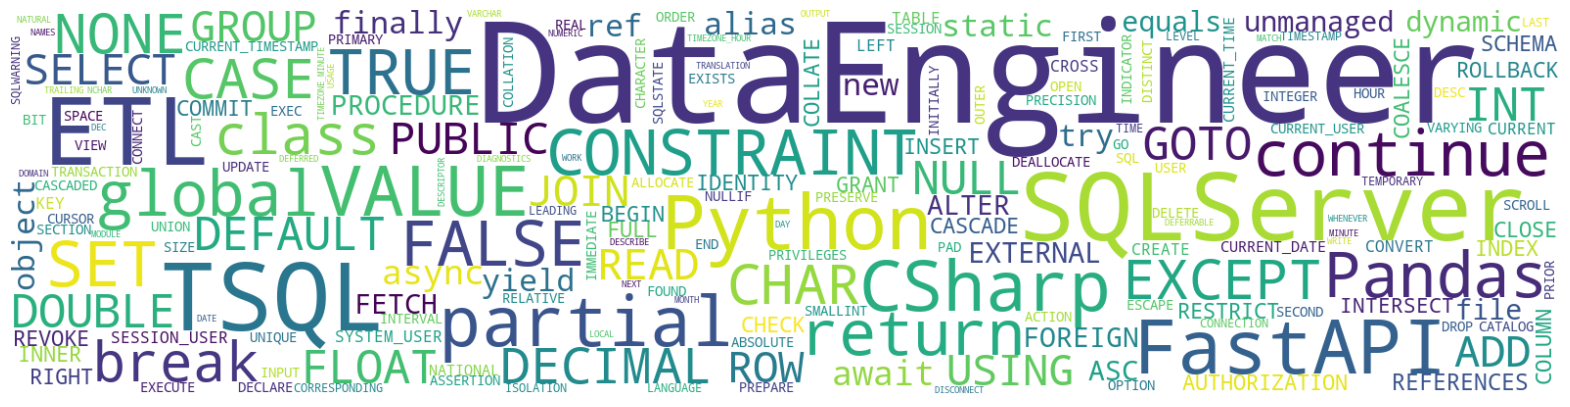

In [180]:
# Entry point
if __name__ == "__main__":
    generate_cloud()